In [203]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
data = pd.read_csv("CarPrice_Assignment.csv")
data = data.drop('car_ID', axis=1)
# Split strings around given separator/delimiter
data['CarName'] = data['CarName'].str.split(' ', expand=True) 
data

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [204]:
data.CarName.unique()
# Typos
# maxda = mazda
# Nissan = nissan
# porsche = porcshce
# toyota = toyouta
# vokswagen = volkswagen = vw

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [205]:
# Replace typos w/ correct name
data.CarName = data.CarName.replace({'maxda': 'mazda', 'Nissan': 'nissan',
                          'porcshce': 'porsche', 'toyouta': 'toyota',
                          'vw': 'volkswagen', 'vokswagen': 'volkswagen'})

In [206]:
data.CarName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [207]:
data['symboling'] = data['symboling'].astype(str)
# cat_col = data.select_dtypes(include=['object']).columns # group columns by datatype
# num_col = data.select_dtypes(exclude=['object']).columns
# df_cat = data[cat_col]
# df_num = data[num_col]

In [208]:
df_num

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,carlength,carwidth
0,13495,88.6,2548,130,3.47,111,21,27,168.8,64.1
1,16500,88.6,2548,130,3.47,111,21,27,168.8,64.1
2,16500,94.5,2823,152,2.68,154,19,26,171.2,65.5
3,13950,99.8,2337,109,3.19,102,24,30,176.6,66.2
4,17450,99.4,2824,136,3.19,115,18,22,176.6,66.4
...,...,...,...,...,...,...,...,...,...,...
200,16845,109.1,2952,141,3.78,114,23,28,188.8,68.9
201,19045,109.1,3049,141,3.78,160,19,25,188.8,68.8
202,21485,109.1,3012,173,3.58,134,18,23,188.8,68.9
203,22470,109.1,3217,145,3.01,106,26,27,188.8,68.9


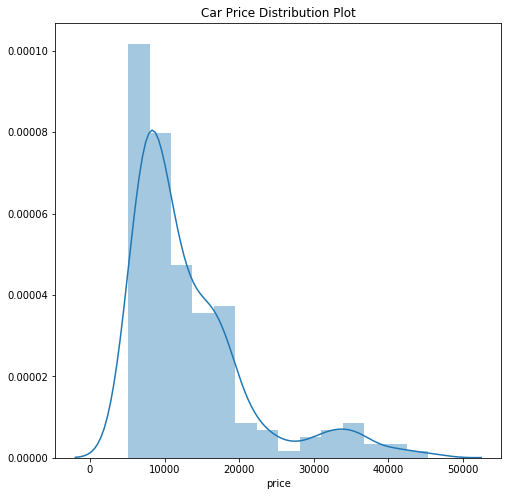

In [209]:
plt.figure(figsize=(8,8))

plt.title('Car Price Distribution Plot')
sns.distplot(data['price'])
plt.show()

### Pairplot of all the numeric variables

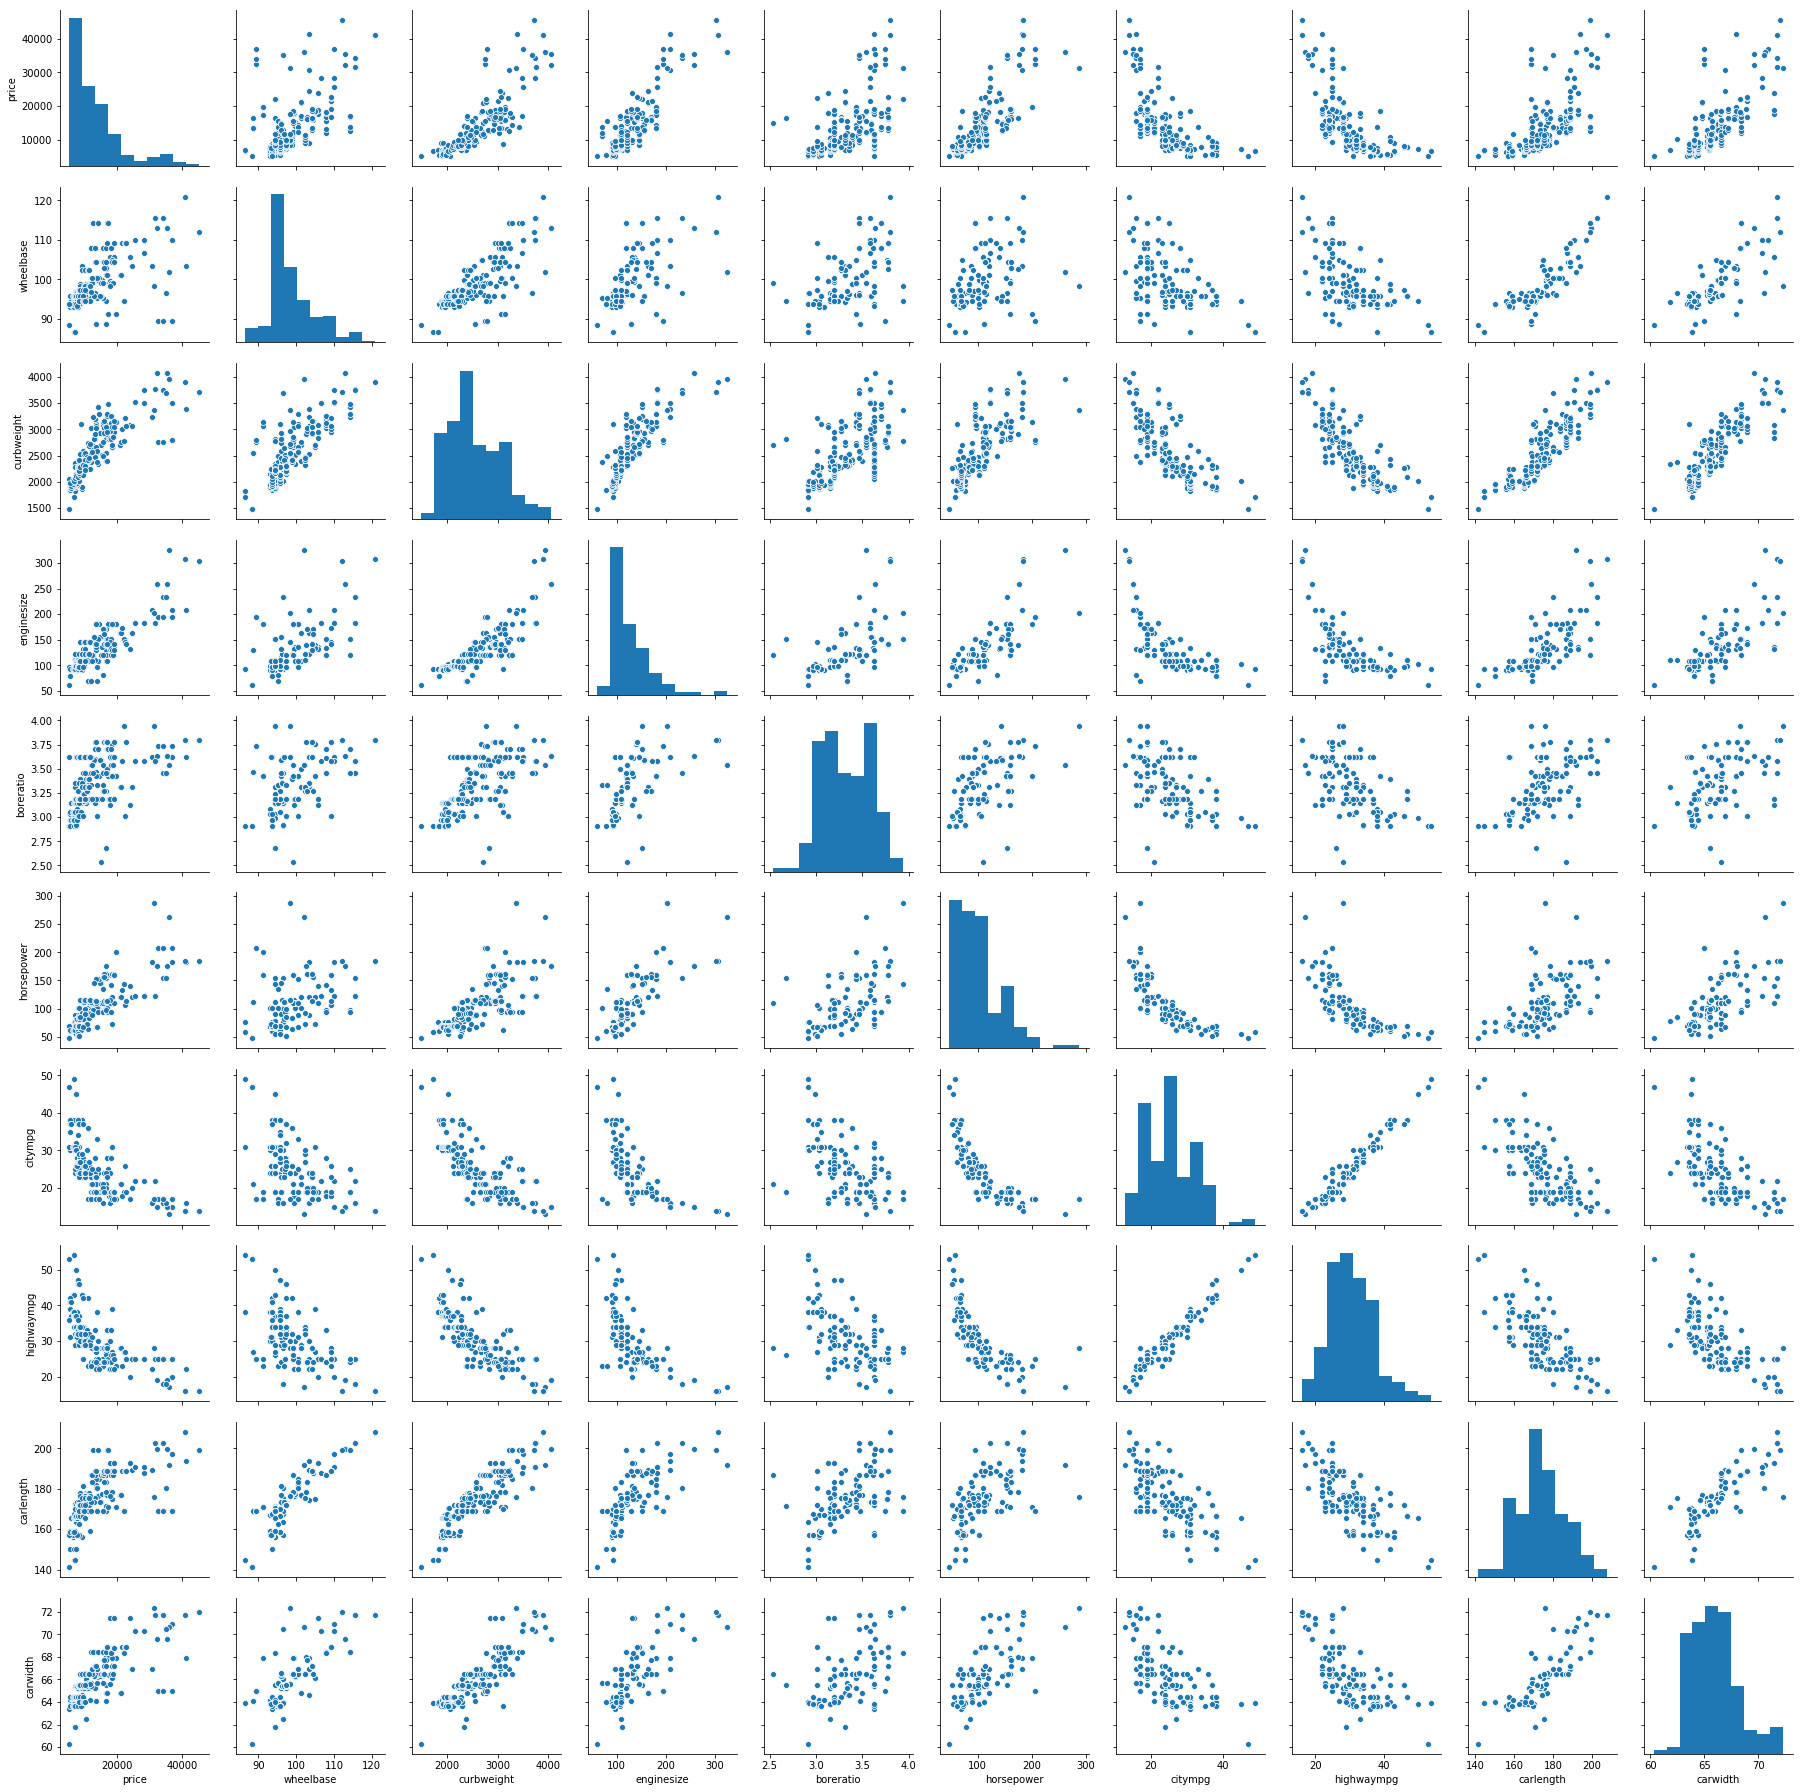

In [210]:
ax = sns.pairplot(data[num_col])

Insights: <br>
- carwidth, carlength, curbweight, enginesize, horsepower seems to have a poitive correlation with price. <br>
- carheight doesn't show any significant trend with price. <br>
- citympg, highwaympg - seem to have a significant negative correlation with price.

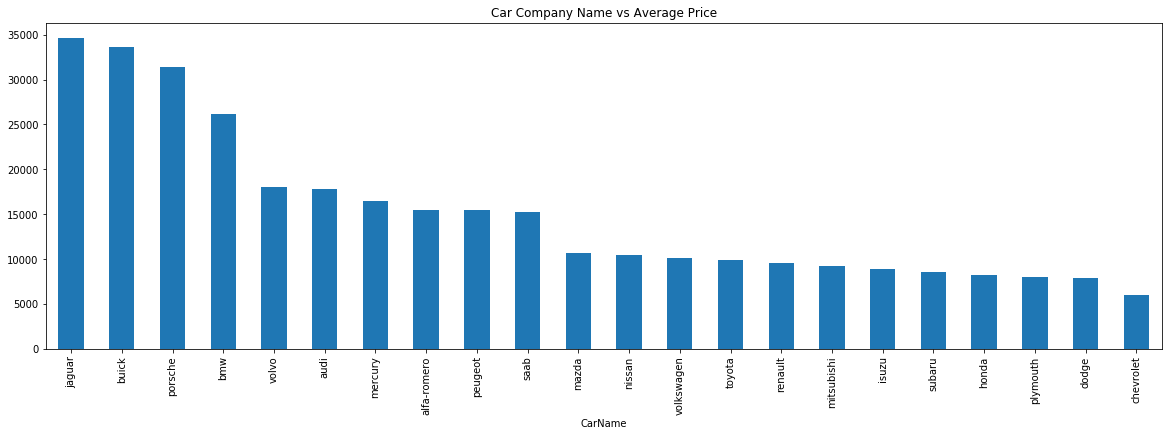

In [211]:
avg_price_company = data.groupby('CarName').price.mean().sort_values(ascending=False)
plt.figure(figsize=(20,6))
avg_price_company.plot.bar()
plt.title('Car Company Name vs Average Price')
plt.show()

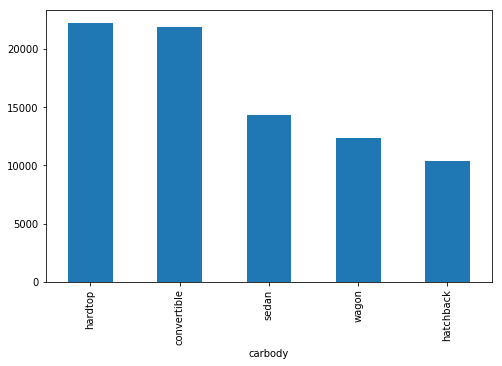

In [212]:
avg_price_body = data.groupby('carbody').price.mean().sort_values(ascending=False)
plt.figure(figsize=(8, 5))
avg_price_body.plot.bar()
plt.show()

In [213]:
data.price = data.price.astype(int)
data.price.dtype

dtype('int64')

Significant categories for determining price

In [214]:
data.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [215]:
sig_col = ['price', 'CarName', 'enginetype','fueltype', 'aspiration','carbody','cylindernumber', 'drivewheel',
            'wheelbase','curbweight', 'enginesize', 'boreratio','horsepower', 
                    'citympg','highwaympg', 'carlength','carwidth']
data = data[sig_col]
data

,price,CarName,enginetype,fueltype,aspiration,carbody,cylindernumber,drivewheel,wheelbase,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,carlength,carwidth
0,13495,alfa-romero,dohc,gas,std,convertible,four,rwd,88.6,2548,130,3.47,111,21,27,168.8,64.1
1,16500,alfa-romero,dohc,gas,std,convertible,four,rwd,88.6,2548,130,3.47,111,21,27,168.8,64.1
2,16500,alfa-romero,ohcv,gas,std,hatchback,six,rwd,94.5,2823,152,2.68,154,19,26,171.2,65.5
3,13950,audi,ohc,gas,std,sedan,four,fwd,99.8,2337,109,3.19,102,24,30,176.6,66.2
4,17450,audi,ohc,gas,std,sedan,five,4wd,99.4,2824,136,3.19,115,18,22,176.6,66.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,16845,volvo,ohc,gas,std,sedan,four,rwd,109.1,2952,141,3.78,114,23,28,188.8,68.9
201,19045,volvo,ohc,gas,turbo,sedan,four,rwd,109.1,3049,141,3.78,160,19,25,188.8,68.8
202,21485,volvo,ohcv,gas,std,sedan,six,rwd,109.1,3012,173,3.58,134,18,23,188.8,68.9
203,22470,volvo,ohc,diesel,turbo,sedan,six,rwd,109.1,3217,145,3.01,106,26,27,188.8,68.9


Convert categories (object values) to integers

In [216]:
cat_col = data.select_dtypes(include=['object']).columns.drop('CarName') # group columns by datatype
dummies = pd.get_dummies(data[cat_col])

In [217]:
dummies

,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fueltype_diesel,fueltype_gas,aspiration_std,...,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd
0,1,0,0,0,0,0,0,0,1,1,...,0,0,1,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,1,1,...,0,0,1,0,0,0,0,0,0,1
2,0,0,0,0,0,1,0,0,1,1,...,0,0,0,1,0,0,0,0,0,1
3,0,0,0,1,0,0,0,0,1,1,...,0,0,1,0,0,0,0,0,1,0
4,0,0,0,1,0,0,0,0,1,1,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0,0,0,1,0,0,0,0,1,1,...,0,0,1,0,0,0,0,0,0,1
201,0,0,0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
202,0,0,0,0,0,1,0,0,1,1,...,0,0,0,1,0,0,0,0,0,1
203,0,0,0,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1


In [218]:
data

,price,CarName,enginetype,fueltype,aspiration,carbody,cylindernumber,drivewheel,wheelbase,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,carlength,carwidth
0,13495,alfa-romero,dohc,gas,std,convertible,four,rwd,88.6,2548,130,3.47,111,21,27,168.8,64.1
1,16500,alfa-romero,dohc,gas,std,convertible,four,rwd,88.6,2548,130,3.47,111,21,27,168.8,64.1
2,16500,alfa-romero,ohcv,gas,std,hatchback,six,rwd,94.5,2823,152,2.68,154,19,26,171.2,65.5
3,13950,audi,ohc,gas,std,sedan,four,fwd,99.8,2337,109,3.19,102,24,30,176.6,66.2
4,17450,audi,ohc,gas,std,sedan,five,4wd,99.4,2824,136,3.19,115,18,22,176.6,66.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,16845,volvo,ohc,gas,std,sedan,four,rwd,109.1,2952,141,3.78,114,23,28,188.8,68.9
201,19045,volvo,ohc,gas,turbo,sedan,four,rwd,109.1,3049,141,3.78,160,19,25,188.8,68.8
202,21485,volvo,ohcv,gas,std,sedan,six,rwd,109.1,3012,173,3.58,134,18,23,188.8,68.9
203,22470,volvo,ohc,diesel,turbo,sedan,six,rwd,109.1,3217,145,3.01,106,26,27,188.8,68.9


In [219]:
num_data = data.select_dtypes(exclude='object')
data_set = pd.concat([num_data, dummies], axis=1)

Two common ways of rescaling:
- Min-Max scaling
- Standardisation (mean-0, sigma-1)

In [220]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler() # Using standardization
# Apply scaler() to all the columns except the 'dummy' variables
import warnings
warnings.filterwarnings("ignore")
sig_num_col = ['wheelbase','carlength','carwidth','curbweight',
               'enginesize','boreratio','horsepower','citympg','highwaympg']
data_set[sig_num_col] = scaler.fit_transform(data_set[sig_num_col])
data_set

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,carlength,carwidth,...,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd
0,13495,-1.690772,-0.014566,0.074449,0.519071,0.174483,-0.646553,-0.546059,-0.426521,-0.844782,...,0,0,1,0,0,0,0,0,0,1
1,16500,-1.690772,-0.014566,0.074449,0.519071,0.174483,-0.646553,-0.546059,-0.426521,-0.844782,...,0,0,1,0,0,0,0,0,0,1
2,16500,-0.708596,0.514882,0.604046,-2.404880,1.264536,-0.953012,-0.691627,-0.231513,-0.190566,...,0,0,0,1,0,0,0,0,0,1
3,13950,0.173698,-0.420797,-0.431076,-0.517266,-0.053668,-0.186865,-0.109354,0.207256,0.136542,...,0,0,1,0,0,0,0,0,1,0
4,17450,0.107110,0.516807,0.218885,-0.517266,0.275883,-1.106241,-1.273900,0.207256,0.230001,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,16845,1.721873,0.763241,0.339248,1.666445,0.250533,-0.340094,-0.400490,1.198549,1.398245,...,0,0,1,0,0,0,0,0,0,1
201,19045,1.721873,0.949992,0.339248,1.666445,1.416637,-0.953012,-0.837195,1.198549,1.351515,...,0,0,1,0,0,0,0,0,0,1
202,21485,1.721873,0.878757,1.109571,0.926204,0.757535,-1.106241,-1.128332,1.198549,1.398245,...,0,0,0,1,0,0,0,0,0,1
203,22470,1.721873,1.273437,0.435538,-1.183483,0.047732,0.119594,-0.546059,1.198549,1.398245,...,0,0,0,1,0,0,0,0,0,1


In [240]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data_set, test_size=0.3, random_state=0)
train = train.sort_values('price')
test = test.sort_values('price')
X_train = train.drop('price', axis=1).reset_index().drop('index', axis=1)
y_train = train.price.reset_index().drop('index', axis=1)
X_test = test.drop('price', axis=1).reset_index().drop('index', axis=1)
y_test = test.price.reset_index().drop('index', axis=1)

In [243]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
print(round(reg.score(X_train, y_train), 2)) # R ^ 2
print(round(reg.score(X_test, y_test), 2))

0.93
0.79


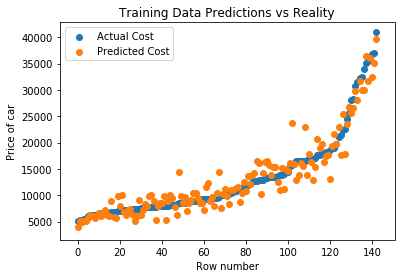

In [250]:
plt.scatter(X_train.index, y_train, label='Actual Cost')
plt.scatter(X_train.index, reg.predict(X_train), label='Predicted Cost')
plt.xlabel('Row number')
plt.ylabel('Price of car')
plt.title('Training Data Predictions vs Reality')
plt.legend()
plt.show()

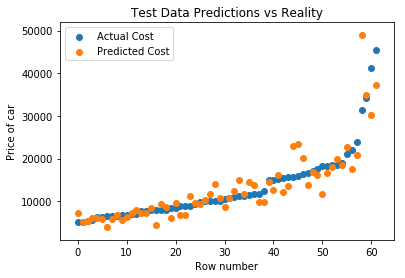

In [251]:
plt.scatter(X_test.index, y_test, label='Actual Cost')
plt.scatter(X_test.index, reg.predict(X_test), label='Predicted Cost')
plt.xlabel('Row number')
plt.ylabel('Price of car')
plt.title('Test Data Predictions vs Reality')
plt.legend()
plt.show()